In [1]:
import scvelo as scv
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad

In [ ]:
# load anndata object for scVelo analysis

In [3]:
adata = sc.read_h5ad('/chg3/analysts/gd2/scVelo_Oligos_Only/FemaleLow/FLOligos_Use_This_For_scVeloAnalysis.h5ad')

In [ ]:
# inspect proportions of spliced and unspliced transcripts in each cluster

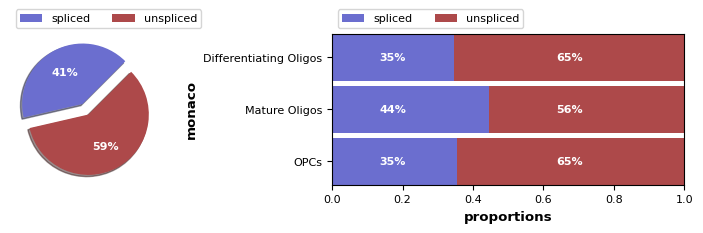

In [4]:
scv.pl.proportions(adata, groupby='monaco')

In [ ]:
# scVelo pre-processing steps

In [6]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)

Normalized count data: X, spliced, unspliced.
computing neighbors
    finished (0:00:28) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [ ]:
# compute RNA velocity using steady-state model (stochastic option)

In [7]:
scv.tl.velocity(adata, mode='stochastic')
scv.tl.velocity_graph(adata)

/usr/local/python/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


computing velocities
    finished (0:00:05) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/24 cores)


  0%|          | 0/1066 [00:00<?, ?cells/s]

    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [ ]:
# visualize velocity fields - broad visualization of velocity across all genes and cells by visualizing vector field

In [ ]:
# on top of 2D dimensional reduction - below is an embedding pic on single cell level

/usr/local/python/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file /chg3/analysts/gd2/New_scVelo/FemaleHighAll_scVelo/FHAllEmbedding2.png


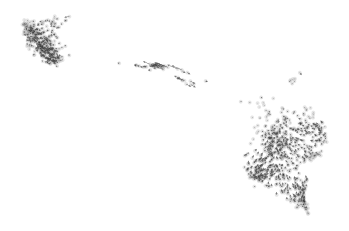

In [8]:
scv.pl.velocity_embedding(adata, arrow_length = 3, arrow_size = 2, dpi=120, basis='umap', frameon=False, save='/chg3/analysts/gd2/New_scVelo/FemaleHighAll_scVelo/FHAllEmbedding2.png')

In [ ]:
# this lets you visualize velocity fields as embedding streamlines

In [ ]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['monaco'], save='/chg3/analysts/gd2/scVelo_Oligos_Only/FemaleLow/FLOligosEmbeddingStream.png')

In [ ]:
# this lets you visualize velocity fields as embedding gridlines

In [ ]:
scv.pl.velocity_embedding_grid(adata, basis='umap', color='monaco', save='/chg3/analysts/gd2/scVelo_Oligos_Only/FemaleLow/FLOligosEmbeddingGrid.png', scale=0.25)

In [ ]:
# identify highly dynamic genes

In [ ]:
scv.tl.rank_velocity_genes(adata, groupby='monaco', min_corr=.3)

df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head()

In [ ]:
# write dynamic gene results to a csv file

In [ ]:
df.to_csv('/chg3/analysts/gd2/scVelo_Oligos_Only/FemaleLow/FLOligoStochasticGenes.csv')

In [ ]:
# look at speed and coherence (speed: length of velocity vector, coherence: how well vector correlates to neighbors)

In [ ]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95], save='/chg3/analysts/gd2/New_scVelo/FemaleHighAll_scVelo/FHAllVelocityConfidence.png')

In [ ]:
# look at differentiation speeds by cluster

In [ ]:
df = adata.obs.groupby('monaco2')[keys],mean().T
df.style.background_gradient(cmap='coolwarm', axis=1)

In [ ]:
# take a look at pseudotime

In [ ]:
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot', save='/chg3/analysts/gd2/New_scVelo/FemaleAll_scVelo/FLAllPseudotime.png')

In [ ]:
# this is needed for PAGA analysis

In [ ]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

In [ ]:
scv.tl.paga(adata, groups='monaco2')
df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')

In [ ]:
# for PAGA analysis

In [ ]:
scv.pl.paga(adata, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)

In [ ]:
df = adata.obs.groupby('monaco2')[keys].mean().T
df.style.background_gradient(cmap='coolwarm', axis=1)

In [ ]:
# look at phase portraits of specific marker genes

In [ ]:
scv.pl.velocity(adata, ['Plp1',  'Mag', 'Mog', 'Pdgfra'], ncols=2)

In [ ]:
# look at velocity in cycling progenitors

In [ ]:
scv.tl.score_genes_cell_cycle(adata)
scv.pl.scatter(adata, color_gradients-['S_score', 'G2M_score'], smooth=True, perc=[5,95])

In [ ]:
# save anndata file with info from scVeloc stochastic run through

In [ ]:
adata.write('/chg3/analysts/gd2/scVelo_Oligos_Only/FemaleLow/FLOligos_ThruStochasticModel.h5ad')